Imports and paths

In [5]:
import numpy as np
import scipy.ndimage as ndimage
from matplotlib import pyplot as plt

DATA_PATH = "data/mona_lisa.jpg"

Interpolation function

In [53]:
def map(image, t_mapping, interpolation):
    if interpolation == "nn":
        t_mapping = np.rint(t_mapping).astype(int)
        x = t_mapping[0]
        y = t_mapping[1]
        # Find out which coordinates should be None
        x_nones_parts = np.where(((x < 0) | (x >= image.shape[0] - 1)))
        x_nones = list(zip(x_nones_parts[0], x_nones_parts[1]))
        y_nones_parts = np.where(((y < 0) | (y >= image.shape[1] - 1)))
        y_nones = list(zip(y_nones_parts[0], y_nones_parts[1]))
        nones = np.concatenate((x_nones, y_nones))

        # Clip values from 0 to max shape
        np.clip(x, 0, image.shape[0]-1, x)
        np.clip(y, 0, image.shape[1]-1, y)
        ret_img = image[x, y]
        for coord in nones:
            ret_img[coord[0], coord[1]] = None
        return ret_img

    elif interpolation == "bi":
        pass

Utilities

In [7]:
def rotate(pts, rds):
    theta = np.radians(rds)
    # Rotation operation:
    # Rv = [xcos(theta) - ysin(theta), xsin(theta) + ycos(theta)]
    r_pts_x = pts[0] * np.cos(theta) - pts[1] * np.sin(theta)
    r_pts_y = pts[0] * np.sin(theta) + pts[1] * np.cos(theta)
    return np.array([r_pts_x, r_pts_y])


def plot_points(pts):
    plt.figure()
    plt.imshow(img)
    plt.plot(pts[1, :], pts[0, :])

Reading data

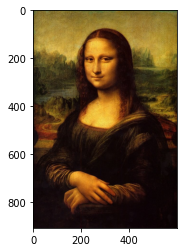

In [9]:
img = plt.imread(DATA_PATH)/255
plt.imshow(img)

Generate picture coordinates used for interpolation

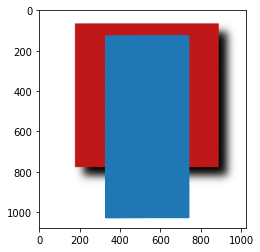

In [200]:
X, Y = np.meshgrid(np.arange(512), np.arange(512))
# Scale and move image
X = X*410/X.shape[0]
Y = Y*900/Y.shape[0]
X += 330
Y += 128
points = np.array((Y.reshape(-1), X.reshape(-1)))
plt.figure()
plt.imshow(img)
plt.plot(points[1, :], points[0, :])

Adapt shape for map processing

In [201]:
mapping = np.array([Y, X])
mapping.shape

(2, 512, 512)

Show interpolated picture using built-in function

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


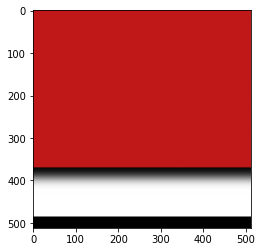

In [202]:
img_tr = np.zeros((X.shape[0], X.shape[1], 3))
img_tr[:, :, 0] = ndimage.interpolation.map_coordinates(img[:, :, 0], mapping)
img_tr[:, :, 1] = ndimage.interpolation.map_coordinates(img[:, :, 1], mapping)
img_tr[:, :, 2] = ndimage.interpolation.map_coordinates(img[:, :, 2], mapping)
plt.figure()
plt.imshow(img_tr)

Preprocess image and set variables

In [11]:
# Set new shape
new_shp = (128, 128)
x, y = np.meshgrid(np.arange(new_shp[0]), np.arange(new_shp[1]))
# new_x and new_y represent the indices we need to interpolate
new_x = ((img.shape[0]-1) / (new_shp[0]-1)) * x
new_y = ((img.shape[1]-1) / (new_shp[1]-1)) * y

# Rotate newly created points
points = np.array([new_y, new_x])
points = rotate(points, 45)

# Move mapping
points[0] += 250
points[1] += 0

mapping = np.array([points[0], points[1]])


Nearest neighbor interpolate

TypeError: Image data of dtype object cannot be converted to float

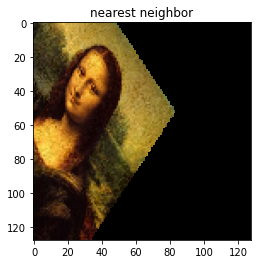

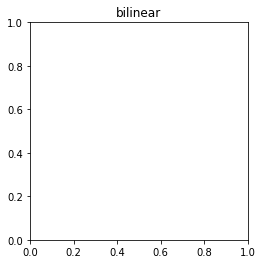

In [55]:
# Nearest neighbor
nn_interpolated = map(img, mapping, "nn")
plt.figure()
plt.title("nearest neighbor")
plt.imshow(nn_interpolated)

# Bilinear
bi_interpolated = map(img, mapping, "bi")
plt.figure()
plt.title("bilinear")
plt.imshow(bi_interpolated)

In [6]:
print("Nearest neighbor interpolation")

Nearest neighbor interpolation
